In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm_jetscapeml_source')#WSU Grid
    sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()


In [2]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=5
epochs=2
dataset_size=10000 #10800000 #1000000
model_name="vgg16_net"
simulation_name=f"alpha_s_{model_name}_{folds}_fold_{epochs}_epoch_{int(dataset_size/1000)}k_dataset_size"

config=Config(simulation_name=simulation_name)

2024-08-25 13:57:16.897059: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 13:57:16.904315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 13:57:16.912878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 13:57:16.915389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 13:57:16.921976: I tensorflow/core/platform/cpu_feature_guar

Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size already exists.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size already exists.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size already exists.


In [3]:
import tensorflow as tf
from IPython.display import display
# with tf.device("CPU"):
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(dataset_size)
y_classes=y_df.columns
y=y_df.values
display("y_classes: ",y_classes)
display("y: ",y[:5])
display("y_raw: ",y_raw[:5])

Dataset Preprocessor
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


I0000 00:00:1724608637.967105  321825 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724608637.988039  321825 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724608637.988162  321825 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724608637.989645  321825 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

'y_classes: '

Index(['0.2', '0.3', '0.4'], dtype='object')

'y: '

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

'y_raw: '

array(['0.4', '0.4', '0.2', '0.4', '0.4'], dtype='<U32')

In [ ]:
import tensorflow as tf

# Check if GPUs are available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs are available:", gpus)
else:
    print("No GPUs found, using CPU.")

Fold #1


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724608639.768716  321947 service.cc:146] XLA service 0x7a9670018430 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724608639.768733  321947 service.cc:154]   StreamExecutor device (0): Host, Default Version
2024-08-25 13:57:19.903985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1724608641.487596  321947 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3301 - loss: 246.8560
Epoch 1: val_loss improved from inf to 246.49352, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size/vgg16_net_fold_1_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3304 - loss: 246.8466 - val_accuracy: 0.3550 - val_loss: 246.4935 - learning_rate: 5.0000e-06
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step
Fold score (accuracy): 0.355
training_history_fold_1.csv


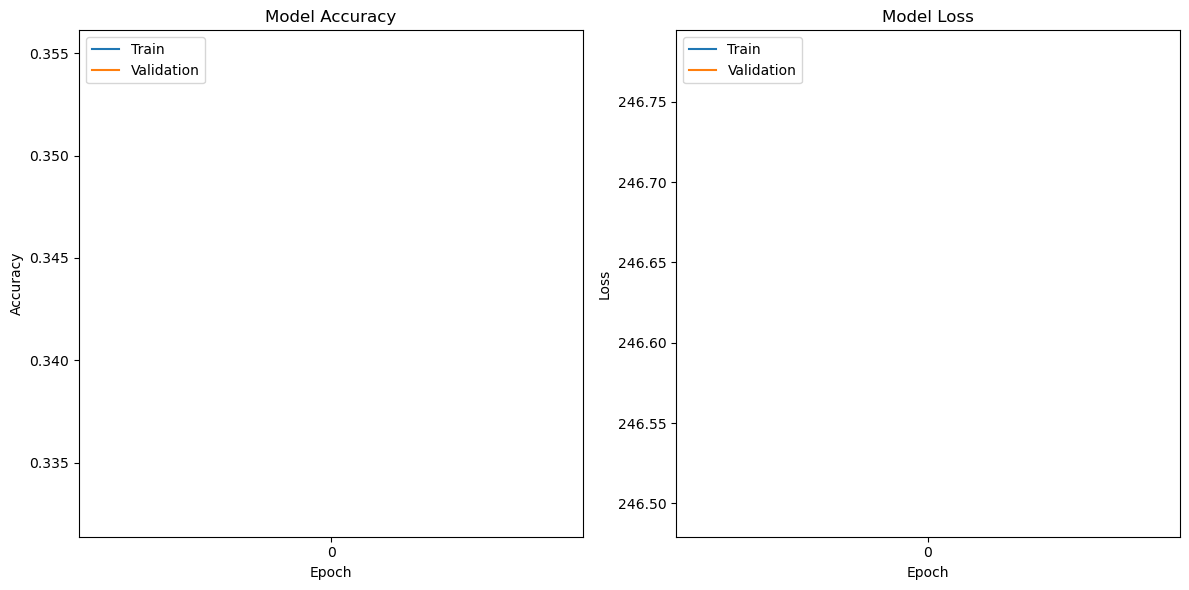

Fold #2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3337 - loss: 246.8670
Epoch 1: val_loss improved from inf to 246.50128, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size/vgg16_net_fold_2_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.3339 - loss: 246.8574 - val_accuracy: 0.3350 - val_loss: 246.5013 - learning_rate: 5.0000e-06
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:32
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step
Fold score (accuracy): 0.335
training_history_fold_2.csv


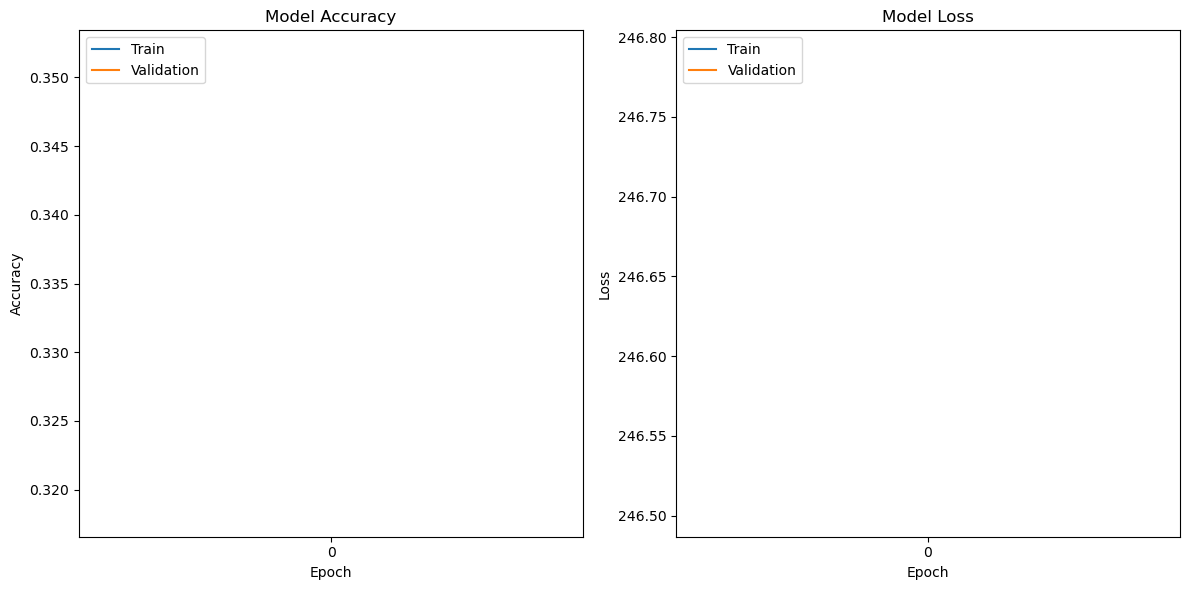

Fold #3


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3444 - loss: 246.8639
Epoch 1: val_loss improved from inf to 246.50349, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size/vgg16_net_fold_3_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.3440 - loss: 246.8543 - val_accuracy: 0.3550 - val_loss: 246.5035 - learning_rate: 5.0000e-06
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:33
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step
Fold score (accuracy): 0.355
training_history_fold_3.csv


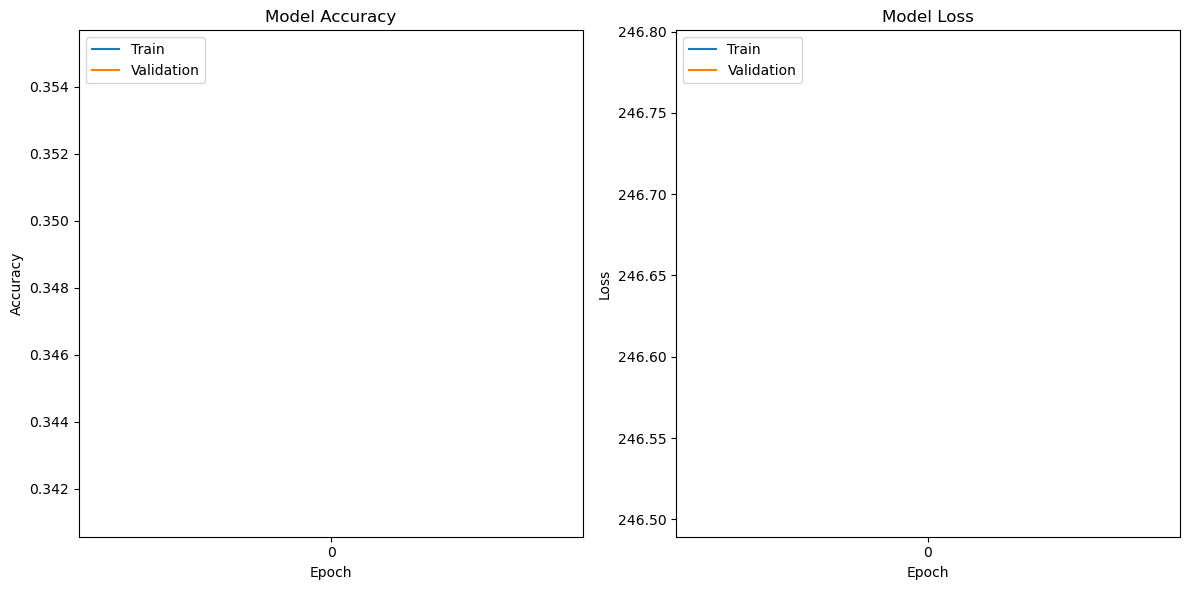

Fold #4


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3604 - loss: 246.6322
Epoch 1: val_loss improved from inf to 246.27248, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size/vgg16_net_fold_4_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.3594 - loss: 246.6226 - val_accuracy: 0.3150 - val_loss: 246.2725 - learning_rate: 5.0000e-06
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:35
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 527ms/step
Fold score (accuracy): 0.315
training_history_fold_4.csv


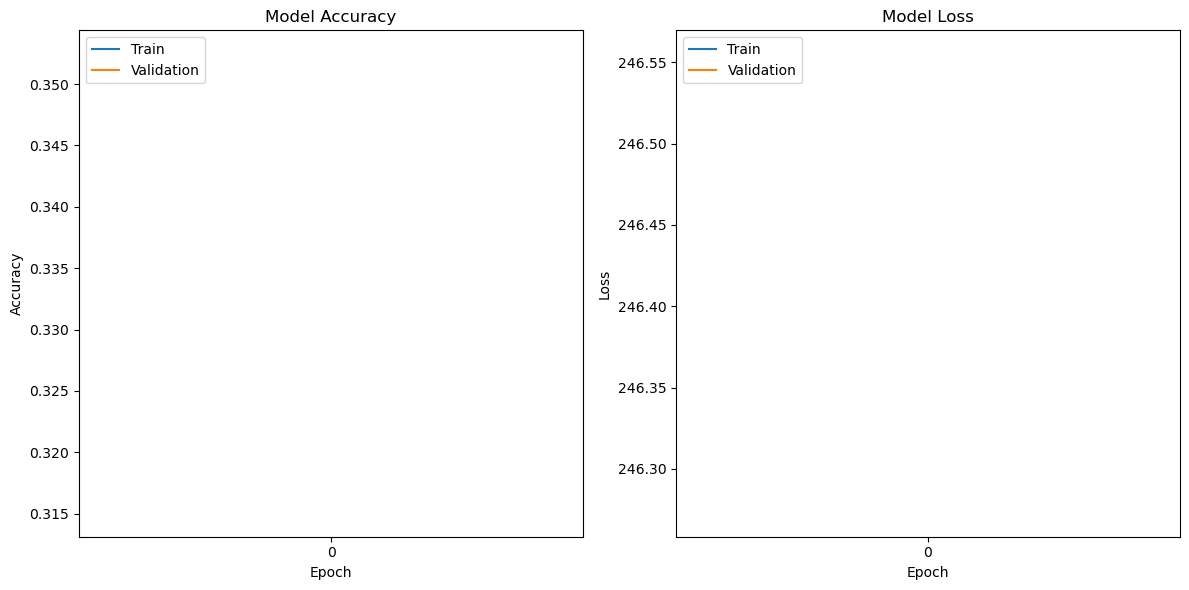

Fold #5


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3373 - loss: 246.9568WARNING:tensorflow:5 out of the last 9 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x7a967c726160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

Epoch 1: val_loss improved from inf to 246.59517, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_vgg16_net_5_fold_1_epoch_1k_dataset_size/vgg16_net_fold_5_model.keras
7/7 ━━━

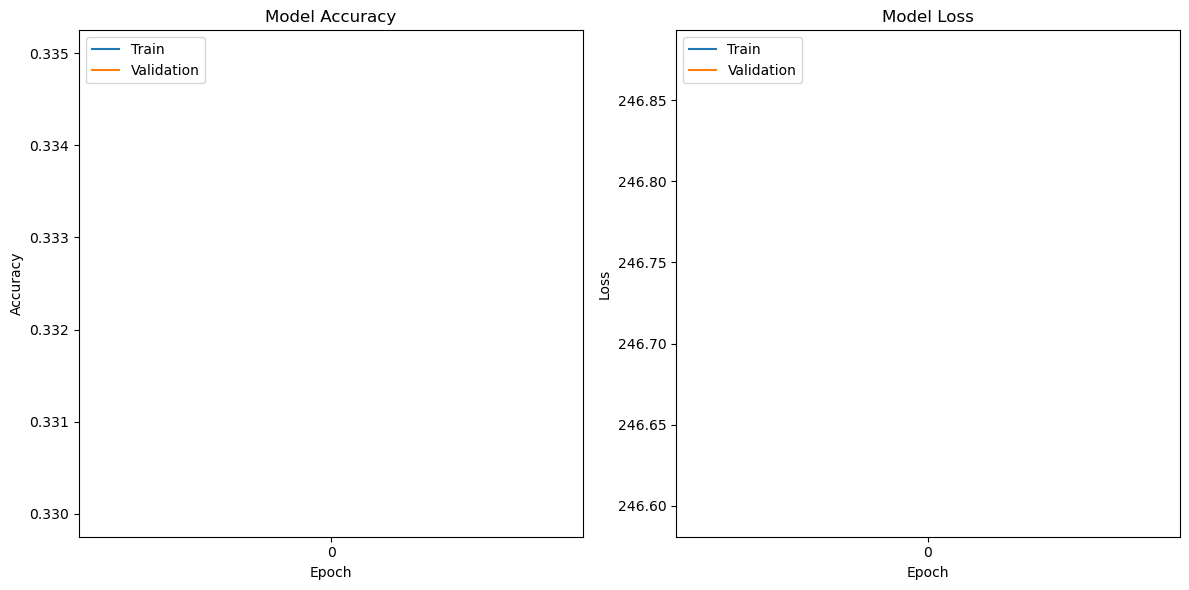

stored all splits' history in training_stats.csv


In [4]:
# fold, shuffle, x, y_raw
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
k_fold=StratifiedKFold(folds,shuffle=False)

out_of_sample_y=[]
out_of_sample_pred=[]
fold=0
folds_accuracy=[]
epochs_needed = []
times_taken=[]
#Must specify y StratifiedKFold for classification
for train,test in k_fold.split(x,y_raw):
    fold+=1
    print(f"Fold #{fold}")

    x_train=x[train]
    y_train=y[train]
    x_test=x[test]
    y_test=y[test]

    from jet_ml.models import vgg16_net
    input_shape=x[0].shape
    output_shape=y.shape[1]
    activation='softmax'
    # with tf.device("CPU"):
    model=vgg16_net.build_model(input_shape,output_shape,activation)
    model=vgg16_net.compile_model(model)


    batch_size=128
    # batch_size=256 #original patch size applies for eloss classification
    monitor='val_loss' #'val_accuracy' or 'val_loss'
    
    model, history,elapsed_time,stopped_epoch=vgg16_net.train_model(model,
                                        x_train,y_train, x_test,y_test, 
                                        epochs, batch_size, monitor,
                                        fold=fold)

    from jet_ml.evaluation import get_accuracy
    pred, score=get_accuracy(model,x_test=x_test,y_test=y_test)
    
    folds_accuracy.append(score)
    times_taken.append(elapsed_time)    
    epochs_needed.append(epochs)

    out_of_sample_y.append(y_test)
    out_of_sample_pred.append(pred)
    print(f"Fold score (accuracy): {score}")

    from jet_ml.evaluation import save_training_history
    save_training_history(history=history,fold=fold)

    from jet_ml.evaluation import plot_training_history
    plot_training_history(history=history,fold=fold)

from jet_ml.evaluation import save_training_stats
save_training_stats(accuracies=folds_accuracy,
                    epochs_needed=epochs_needed,
                    times_taken=times_taken)

# # Build the oos prediction list and calculate the error.
out_of_sample_y=np.concatenate(out_of_sample_y)
out_of_sample_pred=np.concatenate(out_of_sample_pred)

out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation

In [5]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

0.338

In [6]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y,out_of_sample_pred,y_classes)

Confusion matrix, without normalization
[[157 101  76]
 [158 100  76]
 [147 104  81]]
Normalized confusion matrix
[[0.47 0.3  0.23]
 [0.47 0.3  0.23]
 [0.44 0.31 0.24]]


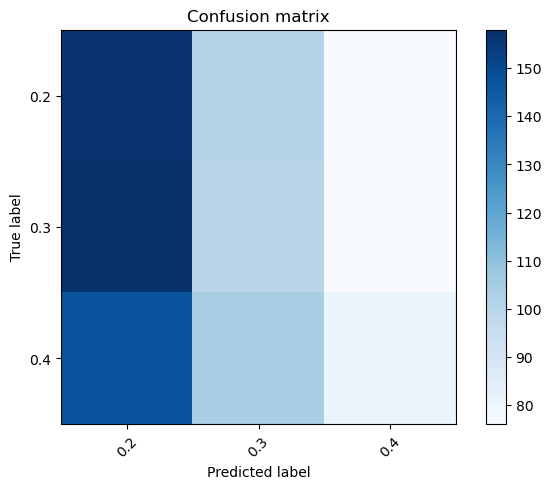

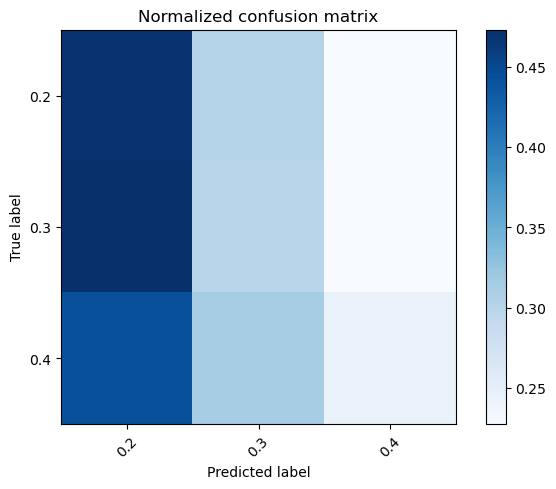

In [7]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)